In [21]:
import numpy as np
import scipy.io
import scipy
from scipy import stats
import math
import matplotlib.pyplot as plt
import pandas as pd
from ipynb.fs.full.utils import *

In [22]:
shot_scale_csv = pd.read_csv('E:/FPP_files_and_codes/FPP_files/shot_scale_labels/corrected_shot_scale_predictions.csv')

In [23]:
shot_scale_labels = np.array(shot_scale_csv['human_pred'])

In [24]:
set(shot_scale_labels)

{'CS', 'LS', 'MS', 'Unclear'}

In [25]:
shot_scale_labels.shape

(3655,)

In [26]:
CS_seconds = np.where(shot_scale_labels == 'CS')[0]
LS_seconds = np.where(shot_scale_labels == 'LS')[0]
MS_seconds = np.where(shot_scale_labels == 'MS')[0]

In [27]:
print(CS_seconds.shape)
print(MS_seconds.shape)
print(LS_seconds.shape)

(1856,)
(833,)
(463,)


In [28]:
delay = 4
shifted_CS_seconds = (CS_seconds + delay)%3655
shifted_MS_seconds = (MS_seconds + delay)%3655
shifted_LS_seconds = (LS_seconds + delay)%3655

In [29]:
mean_FPPs_activity = mean_FPPs_movie_data()

In [30]:
mean_FPPs_activity.shape

(5, 3655)

In [31]:
mean_activity_each_FPP_in_different_shot_scales = np.zeros((5,3))
SEM_mean_activity_each_FPP_in_different_shot_scales = np.zeros((5,3))

for i in range(5):

    FPP_activity = mean_FPPs_activity[i]

    FPP_CS = FPP_activity[shifted_CS_seconds]

    FPP_MS = FPP_activity[shifted_MS_seconds]

    FPP_LS = FPP_activity[shifted_LS_seconds]

    means = [np.mean(FPP_CS), np.mean(FPP_MS), np.mean(FPP_LS)]
    mean_activity_each_FPP_in_different_shot_scales[i] = means

    SEMs = [stats.sem(FPP_CS), stats.sem(FPP_MS), stats.sem(FPP_LS)]
    SEM_mean_activity_each_FPP_in_different_shot_scales[i] = SEMs



In [32]:
FPP_CS.shape

(1856,)

In [33]:
mean_activity_each_FPP_in_different_shot_scales.T

array([[-0.06709582,  0.0008467 ,  0.01179026,  0.00164026, -0.00505646],
       [ 0.05743189,  0.08285006,  0.0680481 ,  0.06228539,  0.07091251],
       [ 0.16798127,  0.07584067,  0.09195417,  0.10208041,  0.10978004]])

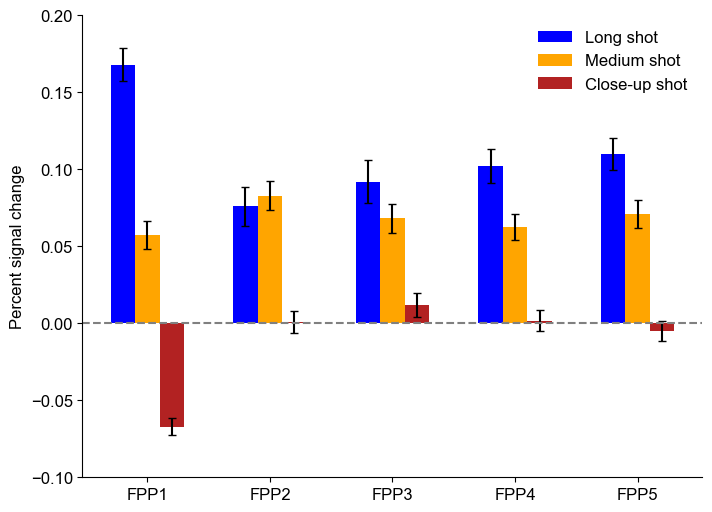

In [34]:
import numpy as np
import matplotlib.pyplot as plt

x_labels = ['FPP1', 'FPP2', 'FPP3', 'FPP4', 'FPP5']
bar_width = 0.2

index = np.arange(len(x_labels))

fig, ax = plt.subplots(figsize=(8, 6))

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

bar1 = ax.bar(index - bar_width, mean_activity_each_FPP_in_different_shot_scales.T[2], bar_width,  yerr=SEM_mean_activity_each_FPP_in_different_shot_scales.T[2], label='Long shot', capsize=3, color='blue')

bar2 = ax.bar(index, mean_activity_each_FPP_in_different_shot_scales.T[1], bar_width,  yerr=SEM_mean_activity_each_FPP_in_different_shot_scales.T[1], label='Medium shot', capsize=3, color='orange')


bar3 = ax.bar(index + bar_width, mean_activity_each_FPP_in_different_shot_scales.T[0], bar_width, yerr=SEM_mean_activity_each_FPP_in_different_shot_scales.T[0], label='Close-up shot', capsize=3, color='firebrick')

ax.axhline(0, color='gray', linestyle='--')

ax.set_ylim(-0.1,0.2)
ax.set_ylabel('Percent signal change')
ax.set_xticks(index)
ax.set_xticklabels(x_labels)
plt.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.savefig('E:/FPP_files_and_codes/Figures/Figure4_files/Row3/shot_scale_barplot.png', dpi=600, bbox_inches='tight')
plt.show()


In [35]:
dic_shot_scales = {
    "FPP" : [],
    "shot_scale" : [],
    "activity" : []
}
for i in range(5):
    
    FPP_activity = mean_FPPs_activity[i]

    FPP_CS = FPP_activity[shifted_CS_seconds]

    CS_list = ["CS" for _ in range(shifted_CS_seconds.shape[0])]
    dic_shot_scales["shot_scale"].extend(CS_list)
    dic_shot_scales["activity"].extend(FPP_CS)

    FPP_MS = FPP_activity[shifted_MS_seconds]

    MS_list = ["MS" for _ in range(shifted_MS_seconds.shape[0])]
    dic_shot_scales["shot_scale"].extend(MS_list)
    dic_shot_scales["activity"].extend(FPP_MS)

    FPP_LS = FPP_activity[shifted_LS_seconds]

    LS_list = ["LS" for _ in range(shifted_LS_seconds.shape[0])]
    dic_shot_scales["shot_scale"].extend(LS_list)
    dic_shot_scales["activity"].extend(FPP_LS)

    sum_seconds = shifted_CS_seconds.shape[0] + shifted_MS_seconds.shape[0] + shifted_LS_seconds.shape[0]
    FPP_list = [f'{i+1}'] * sum_seconds
    dic_shot_scales["FPP"].extend(FPP_list)

In [36]:
shoe_scale_dataframe = pd.DataFrame(dic_shot_scales)

In [37]:
shoe_scale_dataframe

,FPP,shot_scale,activity
0,1,CS,0.123493
1,1,CS,0.131044
2,1,CS,0.117006
3,1,CS,0.115433
4,1,CS,0.049863
...,...,...,...
15755,5,LS,0.036935
15756,5,LS,-0.080641
15757,5,LS,0.001246
15758,5,LS,-0.062085


In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

In [39]:
model = ols('activity ~ C(shot_scale) + C(FPP) + C(shot_scale):C(FPP)', data=shoe_scale_dataframe).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table)

# Tukey's HSD for multiple comparisons
tukey = mc.pairwise_tukeyhsd(endog=shoe_scale_dataframe['activity'], groups=shoe_scale_dataframe['shot_scale'] + shoe_scale_dataframe['FPP'], alpha=0.05)
print("\nTukey's HSD Results:")
print(tukey)


ANOVA Table:
                           sum_sq       df           F         PR(>F)
C(shot_scale)           36.680298      2.0  236.907826  4.265502e-102
C(FPP)                   2.952435      4.0    9.534478   1.071515e-07
C(shot_scale):C(FPP)     7.058150      8.0   11.396655   3.013894e-16
Residual              1218.894513  15745.0         NaN            NaN

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   CS1    CS2   0.0679    0.0   0.037  0.0989   True
   CS1    CS3   0.0789    0.0  0.0479  0.1099   True
   CS1    CS4   0.0687    0.0  0.0378  0.0997   True
   CS1    CS5    0.062    0.0  0.0311   0.093   True
   CS1    LS1   0.2351    0.0  0.1861  0.2841   True
   CS1    LS2   0.1429    0.0  0.0939   0.192   True
   CS1    LS3    0.159    0.0    0.11  0.2081   True
   CS1    LS4   0.1692    0.0  0.1202  0.2182   True
   CS1    LS5   0.1769    0.0  0